## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part B)

In [4]:
dataset_name = 'shanghai_tech/part_b'
experiment_name = 'sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_01/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_02/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_03/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_04/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_05/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_06/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_07/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_08/results.csv
./shanghai_tech/part_b/s

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

val_mae = get_results(res_list, metric='MAE', split='val')
test_mae = get_results(res_list, metric='MAE', split='test')
best_epoch = np.argmin(val_mae)

print(f'epoch: {best_epoch + 1},  val_mae: {val_mae[best_epoch]}')
print(f'epoch: {best_epoch + 1}, test_mae: {test_mae[best_epoch]}')

[60.01, 51.672, 43.881, 62.785, 58.597, 49.847, 31.893, 38.891, 68.58, 59.46, 33.334, 38.184, 37.301, 34.592, 23.660999999999998, 33.108000000000004, 43.36, 33.989000000000004, 36.939, 25.484, 22.135, 23.006999999999998, 26.087, 24.81, 23.293000000000003, 30.248, 22.416999999999998, 54.339, 19.298, 23.388, 33.029, 21.947, 23.570999999999998, 30.505, 16.76, 27.894000000000002, 17.167, 20.409000000000002, 20.302, 26.379, 21.88, 20.06, 29.846, 25.956999999999997, 17.324, 16.024, 17.857, 26.994, 33.184, 12.989]
[55.963, 45.54600000000001, 36.482, 56.657, 51.816, 43.092, 26.261999999999997, 34.031, 70.918, 53.648, 27.616999999999997, 31.675, 32.445, 27.479, 19.961, 27.458000000000002, 39.374, 28.579, 30.309, 22.785999999999998, 18.892, 23.357, 23.924, 19.611, 22.801, 25.06, 19.428, 47.597, 16.972, 20.651, 30.261999999999997, 19.463, 22.39, 24.074, 15.03, 29.967, 15.213, 22.279, 17.187, 24.319000000000003, 18.835, 19.194000000000003, 27.248, 24.195999999999998, 16.129, 16.167, 15.55099999999

In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = (1 + np.arange(len(train_res)))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

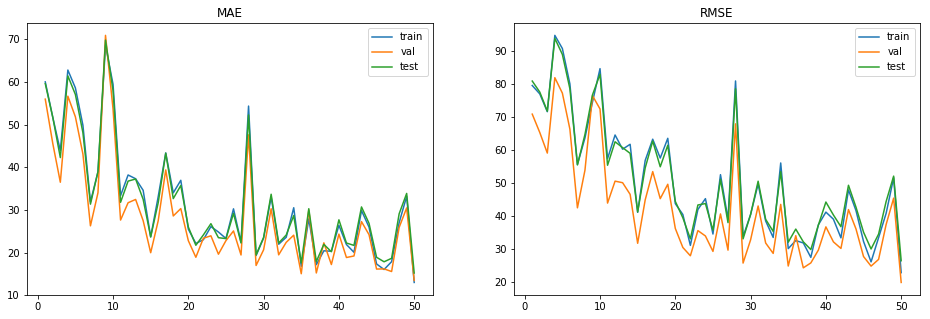

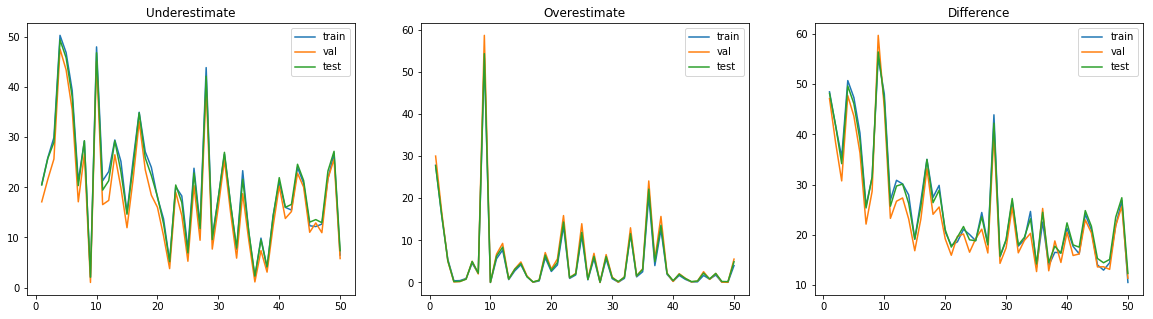

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)